In [1]:
import pickle
import numpy as np
dirname = "/Users/igpp-jalafate/workbox/bathymetry-analysis" + \
                  "/logs/by-cruises/cross-regions/runtime_scores/"
filename_format = dirname + "model_{0:}_test_{0:}_scores.pkl"
region = "AGSO"
with open(filename_format.format(region), "rb") as f:
    (features, labels, scores, weights) = pickle.load(f)
labels = 1 - labels
scores = 1 - scores

lat = features[:, 1]
lon = features[:, 0]
lat_min, lat_max = np.min(lat), np.max(lat)
lon_min, lon_max = np.min(lon), np.max(lon)
features[0]  # lon, lat, measurement, predict

array([ 113.0463 ,  -23.92245, -118.     , -116.     ])

In [2]:
%matplotlib inline
import ipyleaflet
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

center = [(lat_min+lat_max)/2, (lon_min+lon_max)/2]
zoom = 6


m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
m

Map(center=[-34.666505, 123.82063], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [7]:
features.shape

(2053659, 4)

In [ ]:
r = Rectangle(bounds=[[lat_min,lon_min],[lat_max,lon_max]], weight=5, fill_opacity=0.0)
m += r

colors = {
    0: "red",
    1: "green",
}

circles = []
lat = features[:, 1]
lon = features[:, 0]
for index in range(int(features.shape[0] / 1000)):
    _lat = features[index, 1]
    _long = features[index, 0]
    _label = labels[index]
    # taking sqrt of count so that the  area of the circle corresponds to the count
    c = Circle(location=(_lat,_long), radius=1, weight=1,
            color='#F00', opacity=0.8, fill_opacity=0.4,
            fill_color=colors[_label])
    circles.append(c)
    m.add_layer(c)
m

In [ ]:
%matplotlib inline
import ipyleaflet
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

center = [(lat_min+lat_max)/2, (lon_min+lon_max)/2]
zoom = 6

m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)
colors = {
    0: "red",
    1: "green",
}

regions = ['AGSO', 'JAMSTEC', 'NGA', 'NGDC', 'NOAA_geodas', 'SIO', 'US_multi']
dirname = "/Users/igpp-jalafate/workbox/bathymetry-analysis" + \
                  "/logs/by-cruises/cross-regions/runtime_scores/"
filename_format = dirname + "model_{0:}_test_{0:}_scores.pkl"

for region in regions:    
    with open(filename_format.format(region), "rb") as f:
        (features, labels, scores, weights) = pickle.load(f)
    labels = 1 - labels
    scores = 1 - scores
    circles = []

    # to edit out
    lat = features[labels - scores > 0.95, 1]
    lon = features[labels - scores > 0.95, 0]
    # lat_min, lat_max = np.min(lat), np.max(lat)
    # lon_min, lon_max = np.min(lon), np.max(lon)
    for index in range(lat.shape[0]):
        _lat = lat[index]
        _long = lon[index]
        _label = "red"
        # taking sqrt of count so that the  area of the circle corresponds to the count
        c = Circle(location=(_lat,_long), radius=1, weight=1,
                opacity=0.8, fill_opacity=0.4,
                fill_color=_label)
        circles.append(c)
        m.add_layer(c)

    # to rescue
    lat = features[labels - scores < -0.95, 1]
    lon = features[labels - scores < -0.95, 0]
    for index in range(lat.shape[0]):
        _lat = lat[index]
        _long = lon[index]
        _label = "green"
        # taking sqrt of count so that the  area of the circle corresponds to the count
        c = Circle(location=(_lat,_long), radius=1, weight=1,
                opacity=0.8, fill_opacity=0.4,
                fill_color=_label)
        circles.append(c)
        m.add_layer(c)
    
    # r = Rectangle(bounds=[[lat_min,lon_min],[lat_max,lon_max]], weight=5, fill_opacity=0.0)
    # m += r

In [ ]:
print("Done.")

In [14]:
m

Map(center=[-34.666505, 123.82063], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt




AGSO 2053659 1312 737
JAMSTEC 18644752 72357 6138
NGA 185183 3305 285
NGDC 17277131 42949 63469
NOAA_geodas 2712567 2222 7759
SIO 3104942 355349 18389
US_multi 5095320 19611 13181


# Use matplotlib

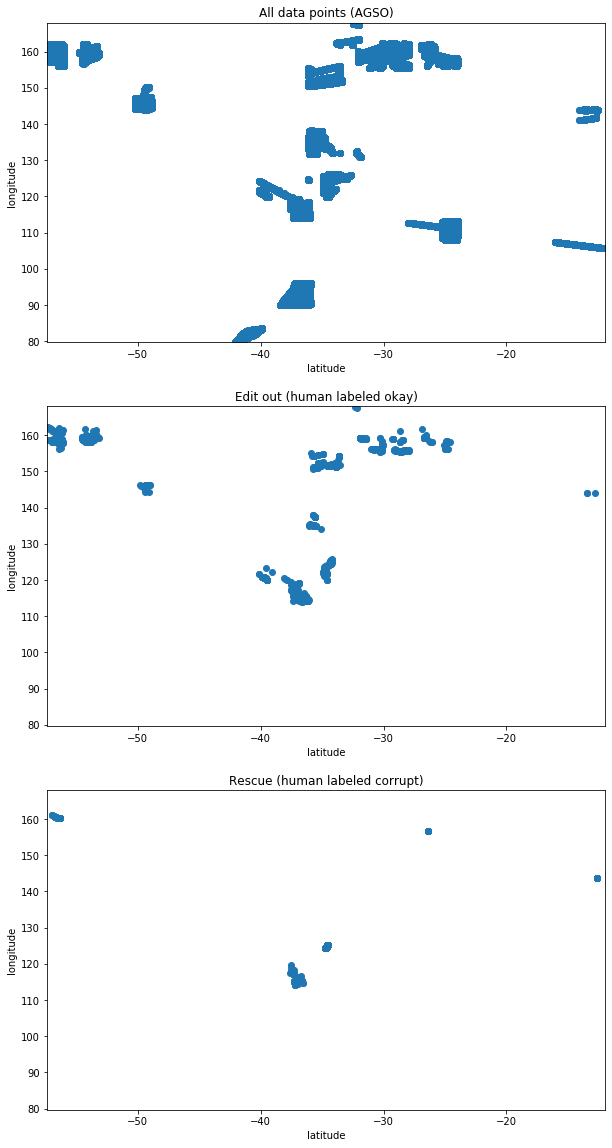

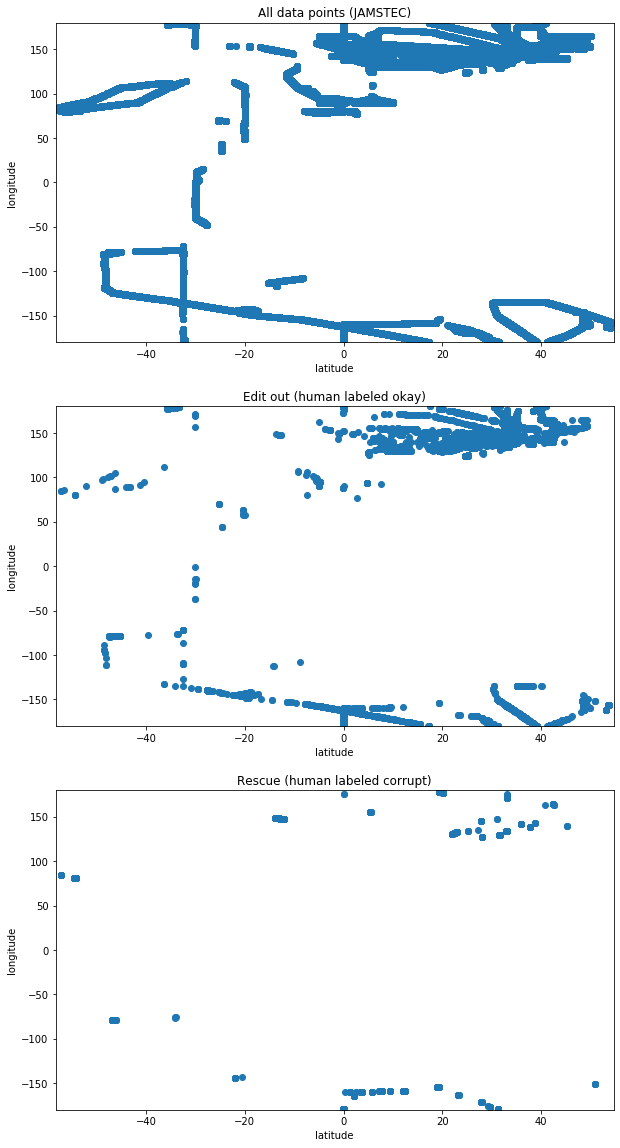

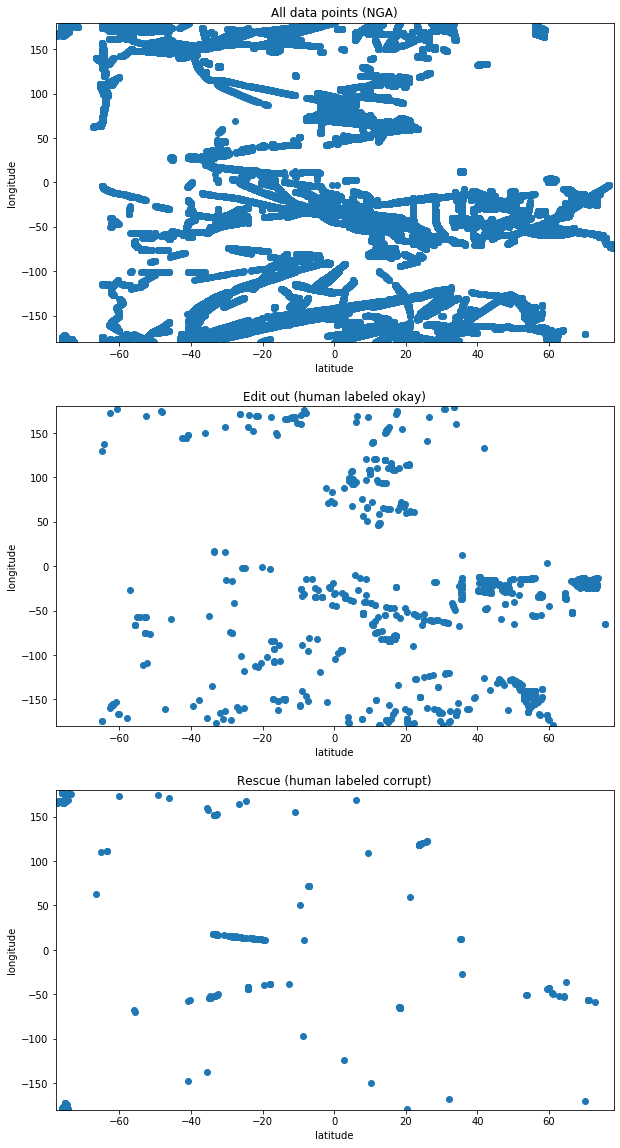

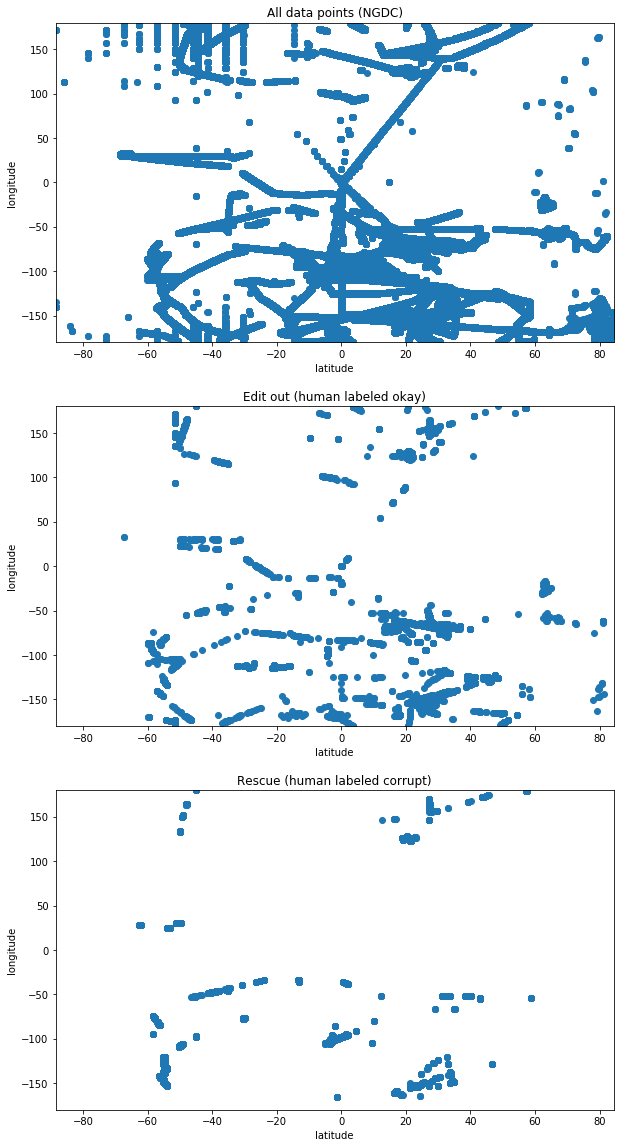

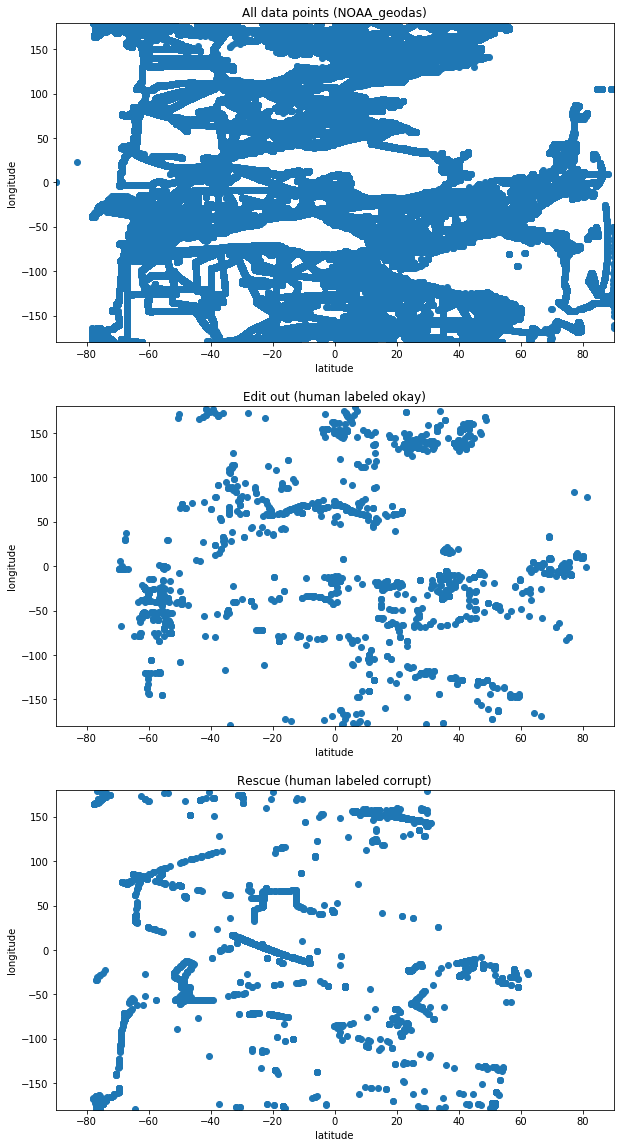

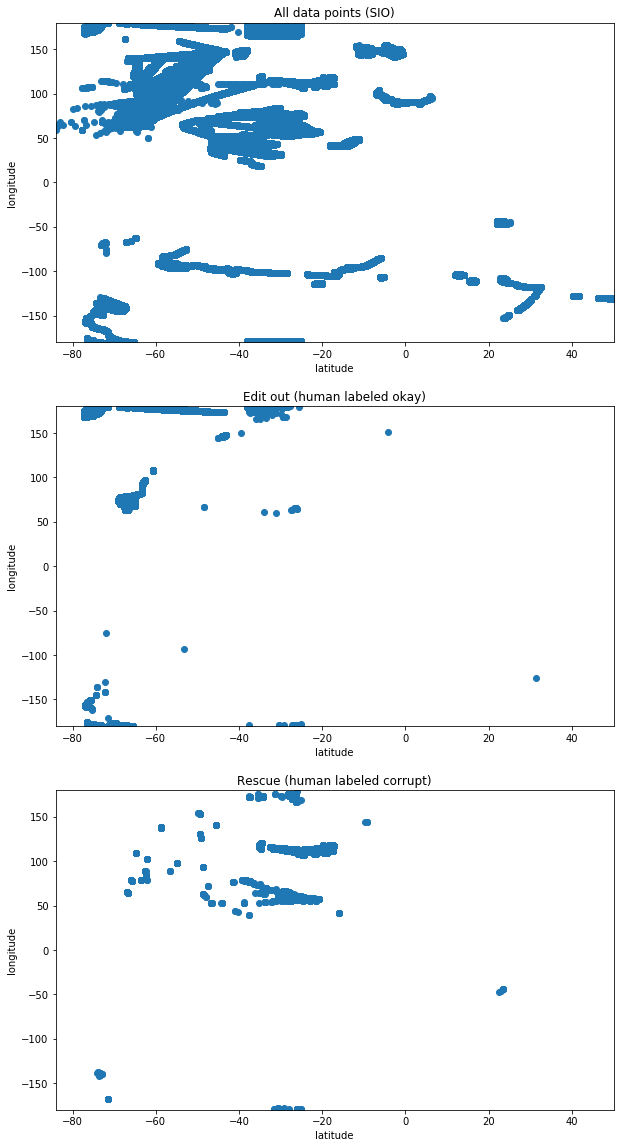

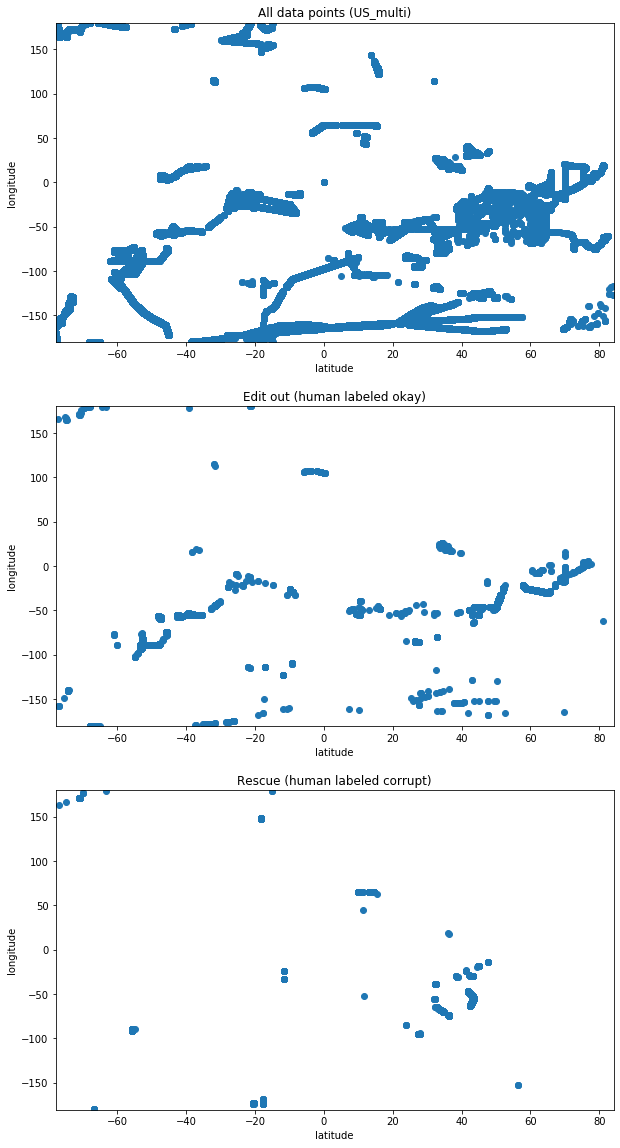

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt


regions = ['AGSO', 'JAMSTEC', 'NGA', 'NGDC', 'NOAA_geodas', 'SIO', 'US_multi']
dirname = "/Users/igpp-jalafate/workbox/bathymetry-analysis" + \
                  "/logs/by-cruises/cross-regions/runtime_scores/"
filename_format = dirname + "model_{0:}_test_{0:}_scores.pkl"

for region in regions:
    with open(filename_format.format(region), "rb") as f:
        (features, labels, scores, weights) = pickle.load(f)
    labels = 1 - labels
    scores = 1 - scores
    fig, ax = plt.subplots(3, 1, figsize=(10, 20))

    x = features[:, 1]
    y = features[:, 0]
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)

    ax[0].scatter(x, y);
    ax[0].set_title("All data points ({})".format(region))

    x = features[labels - scores > 0.95, 1]
    y = features[labels - scores > 0.95, 0]
    ax[1].scatter(x, y);
    ax[1].set_title("Edit out (human labeled okay)")

    x = features[labels - scores < -0.95, 1]
    y = features[labels - scores < -0.95, 0]
    ax[2].scatter(x, y);
    ax[2].set_title("Rescue (human labeled corrupt)")

    for i in range(3):
        ax[i].set_xlabel("latitude")
        ax[i].set_ylabel("longitude")
        ax[i].set_xlim(xmin, xmax)
        ax[i].set_ylim(ymin, ymax);